In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors

df = pd.read_csv('data/bgg_dataset.csv', sep=';')
COLUMN_MAPPING = {
    "ID": "id",
    "Name": "name",
    "Year Published": "year_published",
    "Min Players": "min_players",
    "Max Players": "max_players",
    "Play Time": "play_time",
    "Min Age": "min_age",
    "Users Rated": "users_rated",
    "Rating Average": "rating_average",
    "BGG Rank": "bgg_rank",
    "Complexity Average": "complexity_average",
    "Owned Users": "owned_users",
    "Mechanics": "mechanics",
    "Domains": "domains"
}
    
# Clean data
# Rename Columns to reflect python naming
df = df.rename(columns=COLUMN_MAPPING)
# Adjust European numbering (with commas) with US decimal numbers
df['rating_average'] = df['rating_average'].str.replace(',','.').astype(float)
df['complexity_average'] = df['complexity_average'].str.replace(',','.').astype(float)
# Remove Duplicates
df.fillna({'domains':'missing'}, inplace=True)
df.fillna({'mechanics':'missing'}, inplace=True)
df.fillna({'owned_users':'none'}, inplace = True)
# Create new column that is a list of mechanics
df["mechanics_list"]=df["mechanics"].str.split(',')
# Years should be integers - not floats
df["year_published"]=df["year_published"].fillna(1900).astype(int)

# Clean up 'none' values in the owned_users column and then convert to integer
df["owned_users"] = df["owned_users"].apply(lambda x: 0 if x == 'none' else x)
df["owned_users"] = df["owned_users"].astype(int)
df.drop(columns=["id"], inplace=True)


In [2]:
df["mechanics_list"] = df["mechanics_list"].apply(lambda x: [] if x == ["missing"] else x)



In [3]:
df.loc[df["year_published"] <= 0]

,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users,mechanics,domains,mechanics_list
172,Go,-2200,2,2,180,8,14843,7.64,173,4.00,20398,"Enclosure, Square Grid",Abstract Games,"[Enclosure, Square Grid]"
1043,Eat Poop You Cat,0,3,99,20,0,1589,7.45,1044,1.11,803,Paper-and-Pencil,Party Games,[Paper-and-Pencil]
1275,Backgammon,-3000,2,2,30,8,11680,6.54,1276,2.02,17747,"Advantage Token, Betting and Bluffing, Dice Ro...",Abstract Games,"[Advantage Token, Betting and Bluffing, Dice..."
1488,Carrom,0,2,4,60,6,1600,7.04,1489,1.48,1787,"Flicking, Team-Based Game",Family Games,"[Flicking, Team-Based Game]"
2839,Unpublished Prototype,0,0,0,0,0,804,6.90,2841,2.47,1194,missing,Strategy Games,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20299,Crazy Eights,0,2,5,20,4,941,4.37,20301,1.07,930,"Hand Management, Matching","Children's Games, Family Games","[Hand Management, Matching]"
20332,Go Fish,0,2,6,20,4,1445,3.61,20334,1.05,1223,"Memory, Set Collection",Children's Games,"[Memory, Set Collection]"
20338,War,0,2,2,30,4,1340,2.28,20340,1.00,427,missing,Children's Games,[]
20341,Chutes and Ladders,-200,2,6,30,3,3783,2.86,20343,1.02,4400,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games,"[Dice Rolling, Grid Movement, Race, Roll / ..."


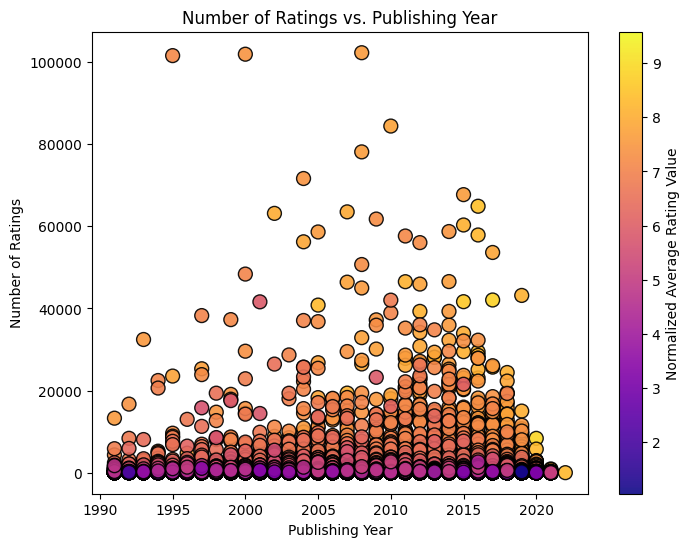

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors

norm = colors.Normalize(
    vmin=df['rating_average'].min(),
    vmax=df['rating_average'].max()
)

modern_df = df.loc[df["year_published"] > 1990]

plt.figure(figsize=(8, 6))  # Size of the figure

scatter = plt.scatter(
    x=modern_df['year_published'],                 # X-axis values
    y=modern_df['users_rated'],                 # Y-axis values
    c=modern_df['rating_average'],            # Raw values to be mapped to colors
    cmap='plasma',                  # Colormap used
    norm=norm,                      # Normalize function for color mapping
    s=100,                          # Marker size
    edgecolor='black',              # Optional: outlines around markers
    alpha=0.9                       # Transparency (0 = transparent, 1 = solid)
)
plt.xlabel('Publishing Year')
plt.ylabel('Number of Ratings')
plt.title("Number of Ratings vs. Publishing Year")

cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Average Rating Value')
# Show plot
plt.show()

# Observation - the number of ratings data peaks around 2015.  Very popular games exist across all time ranges.


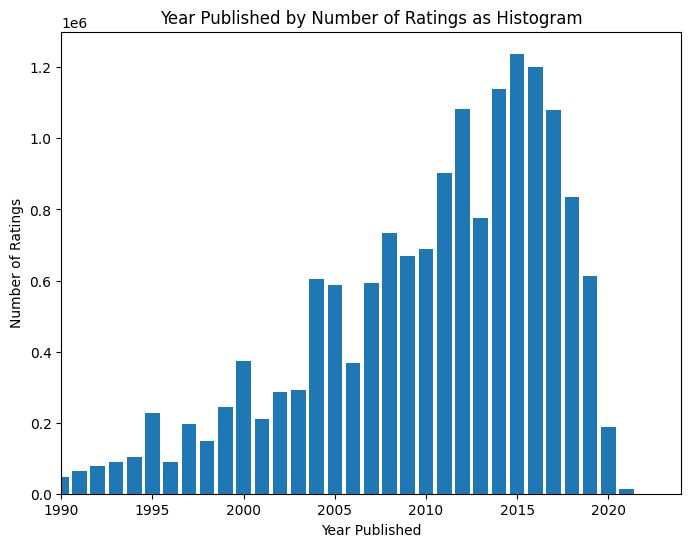

In [6]:
# Histogram - need to know the total number of ratings for a given year
ratings_by_year = df.groupby('year_published')['users_rated'].sum()
ratings_by_year.head()
plt.figure(figsize=(8, 6))  # Size of the figure

bar = plt.bar(ratings_by_year.index, ratings_by_year.values)
plt.xlabel("Year Published")
plt.ylabel("Number of Ratings")
plt.xlim(1990,2024)
plt.title("Year Published by Number of Ratings as Histogram")
plt.show()


In [ ]:
# Owned vs. Rated 
scatter = scatter = plt.scatter(
    x=modern_df['owned_users'],                 # X-axis values
    y=modern_df['users_rated'],                 # Y-axis values
    c=modern_df['rating_average'],            # Raw values to be mapped to colors
    cmap='plasma',                  # Colormap used
    norm=norm,                      # Normalize function for color mapping
    s=100,                          # Marker size
    edgecolor='black',              # Optional: outlines around markers
    alpha=0.9                       # Transparency (0 = transparent, 1 = solid)
)
plt.xlabel("Number of Ratings")
plt.ylabel("Number Of Users Who Own")
plt.title("Owners vs Ratings")
plt.colorbar(scatter)
plt.show()

    